## **14.4 CNN 구조**



- 합성곱층, 풀링층 순서로 반복해서 쌓아지는 것이 전형적인 CNN 구조
- 네트워크를 통과해 진행할 수록 이미지는 점점 작아지지만, 더 깊어짐(더 많은 특성 맵을 가짐)


* **feedforward neural network**: 순환 신경망처럼 뉴런의 출력이 순환되지 않는 구조(**완전 연결 신경망**, 합성곱 신경망)



+ 합성곱 층에는 너무 큰 커널 하나를 사용하는 것보다 작은 커널 두 개를 쌓는 것이 더 나음 -> 파라미터와 계산량이더 적고 일반적으로 더 나은 성능

- But, 첫 번째 합성곱층에서는 일반적으로 큰 크기의 커널과 2 이상의 스트라이드 사용


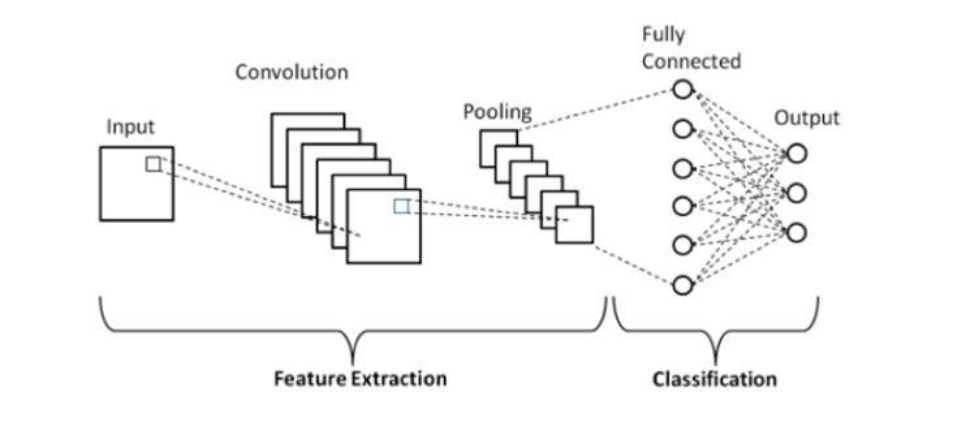

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]), 
                                 # 이미지가 28x28 픽셀 크기이고 컬러 채널이 하나(그레이스 케일)이므로 input_shape=[28, 28, 1]로 지정
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
                                 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
                                 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(64, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10, activation="softmax")
])

- 첫 번째 층은 64개의 필터(7x7)와 스트라이드 1을 사용. 
- 풀링 크기가 2인 최대 폴링 층을 추가해 공간 방향 차원을 절반으로 줄임
- 동일 구조 두 번 반복. 최대 폴링 층이 뒤따르는 합성곱 층 두 번 등장 -> 이미지 크면 더 많이 반복 가능
- 반복 횟수: 튜닝해야 할 하이퍼파라미터
- CNN이 출력층에 다다를 수록 필터 개수 증가
- 저수준 특성의 개수는 적지만 이를 연결해 고수준 특성 생성 가능한 방법이 많아 합리적인 구조
- 풀링 층이 공간 방향 차원을 절반으로 줄임 -> 이어지는 층에서 파라미터 개수, 메모리 사용량, 계산 비용을 크게 늘리지 않고 특성 맵 개수를 두배로 늘릴 수 있음
- 마지막은 두 개의 은닉층과 하나의 출력층으로 구성된 완전 연결 네트워크
- 밀집 네트워크는 샘플의 특성으로 1D 배열을 기대함 -> 입력을 일렬로 펼쳐야 함
- 밀집 층 사이에 과대적합을 줄이기 위해 50% 드롭아웃 비율을 가진 드롭아웃 층 추가

### 14.4.1 LeNet-5

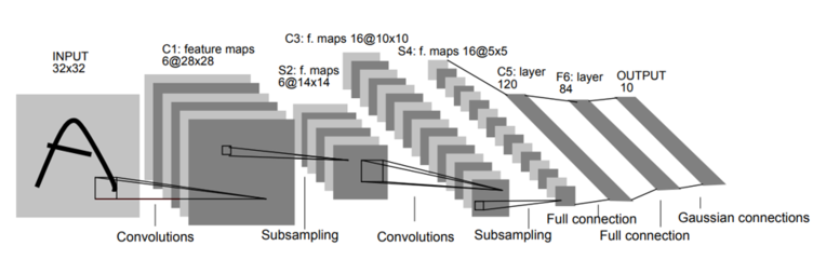

- 가장 널리 알려진 CNN 구조(MNIST에 널리 사용)

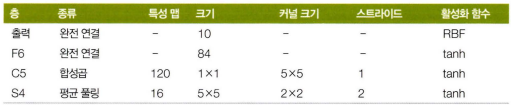

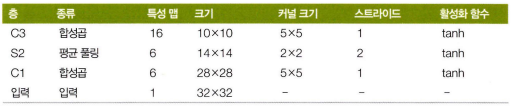

- MSIST 이미지는 제로 패딩 되어 28X28픽셀에서 32X32픽셀이 됨. 네트워크에 주입되기 전에 정규화됨.
- 네트워크의 나머지 부분은 패딩을 사용하지 않아 이미지가 네트워크를 따라 진행하면서 점차 크기가 줄어든다

- 평균 폴링 층의 각 뉴런은 입력의 평균 계산 후, 그 값에 학습되는 계숫값을 곱한다. 이후 편향(학습되는 값)을 더한다. 마지막으로 활성화 함수를 적용함

- C3의 대부분 뉴런은 S2의 3개 또는 4개 맵에 있는 뉴런에만 연결된다

- 출력층은 각 뉴런에서 입력 벡터와 가중치 벡터 사이의 유클리드 거리 출력. 각 출력은 이미지가 얼마나 특정 숫자 클래스에 속하는지 측정함. 최근에는 크로스 엔트로피 비용 함수 선호

### 14.4.2 AlexNet

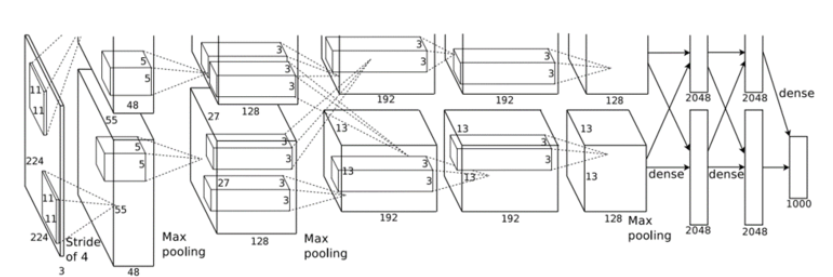

- AlexNet CNN 구조는 더 크고 깊으며, LeNet-5와 비슷함.
- 처음으로 합성곱 층 위에 폴링 층을 쌓지 않고 바로 합성곱 층끼리 쌓음

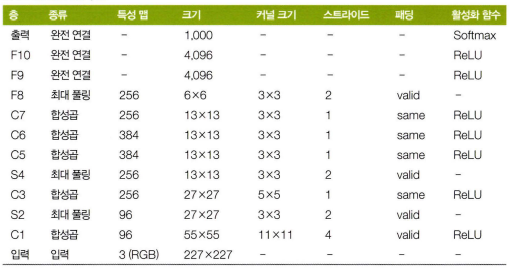

- 과대 적합을 줄이기 위해 두 가지 기법을 사용함
> 1. 훈련하는 동안 F9와 F10의 출력에 드롭아웃을 50% 비율로 적용
> 2. 데이터 증식 수행: 훈련 이미지를 랜덤히 여러 간격으로 이동하거나 수평으로 뒤집고 조명을 바꿈



- **데이터 증식**  data augmentaition
> - 진짜 같은 훈련 샘플을 인공적으로 생성해 훈련 세트의 크기를 늘린다.
> - 데이터 증식은 과대적합을 줄이므로 규제 기법으로 사용 가능함.
> - 생성된 샘플은 가능한 진짜에 가까워야 함
> - 이상적으로는 증식된 훈련 세트에서 이미지를 뽑았을 때 증식된 것인지 아닌지 구분 가능해야 함
> - 단순 백색 잡음 추가는 도움 안됨 -> 증식 방식이 학습 가능해야함

- AlexNet은 C1과 C3 층의 ReLU 단계 후에 바로 LRN(경쟁적인 정규화 단계) 사용함 -> 현재는 많이 사용 x
- 가장 강하게 활성화된 뉴런이 다른 특성 맵에 있는 같은 위치의 뉴런을 억제한다
=> 특성 맵을 각기 특별하게 다른 것과 구분되게 하고, 더 넓은 시각에서 특징을 탐색하도록 만들어 일반화 성능을 향상함

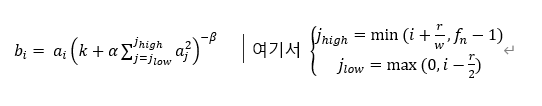

- AlexNet에서 하이퍼파라미터는 r=2, a=0.00002, B =0.75, k=1로 설정됨 -> tf.nn.local_response_normalization()연산을 구현 가능

### 14.4.3 GoogLeNet

- 인셉션 모듈이라는 서브를 가지고 있어 GoogLeNet이 이전 구조보다 훨씬 효과적으로 파라미터 사용함



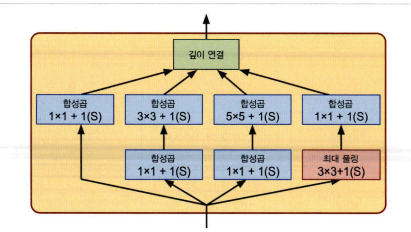

- 처음에 입력 신호가 복사되어 네 개의 다른 층에 주입됨
- 모든 합성곱 층은 ReLU 활성화 함수 사용
- 두 번째 합성곱 층은 각기 다른 크기의 패턴을 잡음

- 모든 층의 출력 높이와 너비가 모두 입력과 같게 해모든 출력을 깊이 연결 층에서 깊이 방향으로 연결 가능
- 텐서플로의 axis=3 매개변수로 tf.concat() 연산을 사용해 구현 가능

- Q. 왜 인셉션 모듈이 1x1 커널의 합성곱 층을 가지는 가?
- A. 이 층은 세 개의 목적을 가지고 있음
> - 깊이 차원을 따라 놓인 패턴을 잡을 수 있다.
> - 입력보다 더 적은 특성 맵을 출력해 병목 층의 역할을 담당한다. 연산 비용과 파라미터 개수를 줄여 훈련 속도를 높이고 일반화 성능을 향상한다.
> - 합성곱 층의 쌍이 더 복잡한 패턴을 감지할 수 있는 한 개의 강력한 합성곱 층처럼 작동한다.
- 즉, 전체 인셉션 모듈을 여러 크기의 복잡한 패턴이 담긴 특성 맵을 출력하는 합성곱 층으로 생각해도 됨
* 각 합성곱 층의 합성곱 커널 수는 하이퍼파라미터 -> 인셉션 모듈 추가시마다 하이퍼파라미터 6개가 더 증가

- 합성곱 층과 풀링 층에서 출력되는 특성 맵의 수는 커널 크기 앞에 표시되어 있음
- GoogLeNet은 네트워크를 하나로 길게 쌓은 구조로, 9개의 인셉션 모듈을 포함하고 있음
- 인셈션 모듈에 있는 여섯 개의 숫자는 모듈 안에 있는 합성곱 층에서 출력하는 특성 맵의 수를 나타냄
- 모든 합성곱 층은 ReLU 활성화 함수 사용

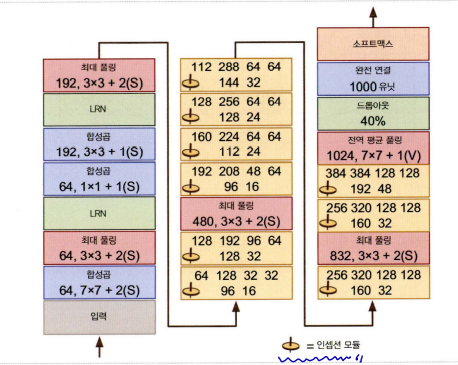

- 처음 두 층은 계산의 양 감소를 위해 이미지 높이와 너비를 4배로 줄임. 첫 번째 층은 큰 크기의 커널 사용 -> 많은 정보 유지
- LRN 층 -> 이전 층이 다양한 특성을 학습하도록 함
- 두 개의 합성곱 층 중 첫 번째 층이 병목 층처럼 작동
- 다시 한 번 LRN 층 작동
- 최대 풀링 층이 계산 속도를 높이기 위해 이미 높이와 너비 두배로 줄임
- 9개의 인셉션 모듈이 길게 이어지고, 최대 풀링 층 몇개 끼워 넣음(차원 감소와 속도 향상을 위해)
- 전역 평균 풀링 층이 각 특성 맵의 평균 출력 -> 공간 방향 정보를 모두 잃음. 이 층에서 수행된 차원 축소는 CNN 위에 몇 개의 완전 연결 층을 둘 필요가 없게 함. 파라미터 수 감소, 과대적합 위험 감소
- 마지막 층은 규제를 위한 드롭아웃 층 다음에 1000개의 유닛과 소프트맥스 활성화 함수를 적용한 완전 연결 층으로 클래스 확률 추정 값 출력


### 14.4.4 VGGNet

- 매우 단순하고 고전적인 구조
- 2개(or 3개)의 합성곱 층 뒤에 폴링 층이 나오고 다시 2개(or 3개)의 합성곱 층과 폴링층이 등장하는 방식
- VGGNet의 종류에 따라 16개 or 19개의 합성곱 층 존재
- 밀집 네트워크는 2개의 은닉층과 출력층으로 구성
- VGGNet은 많은 개수의 필터를 사용하지만 3x3 필터만 사용

### 14.4.5 ResNet

- 더 적은 파라미터를 사용해 점점 더 깊은 네트워크로 모델을 구성하는 일반적인 트렌드를 만들었다.
- 깊은 네트워크를 훈련시킬 수 있는 핵심 요소는 **스킵 연결**(숏컷 연결) -> 어떤 층에 주입되는 신호가 상위 층의 출력에도 더해짐
- 신경망을 훈련시킬 때는 목적 함수 h(x)를 모델링하는 것이 목표
- 잔차 학습: 스킵 연결을 추가해 네트워크가 f(x) = h(x) - x를 학습하게 되는 것

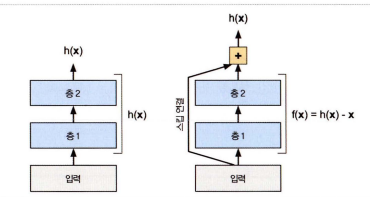

- 일반적인 신경망 초기화 시엔, 가중치가 0에 가까워 네트워크도 0에 가까운 값 출력
- 스킵 연결 추가 -> 네트워크가 입력과 같은 값 출력 => 초기에는 항등함수를 모델링
- 목적 함수가 항등함수에 매우 가까움 -> 훈련 속도 상승
- 스킵 연결 많이 추가 시, 일부 층이 아직 학습되지 않았어도 네트워크는 훈련 시작 가능
- 심층 잔차 네트워크: 스킵 연결을 가진 작은 신경망인 잔차유닛을 쌓은 것

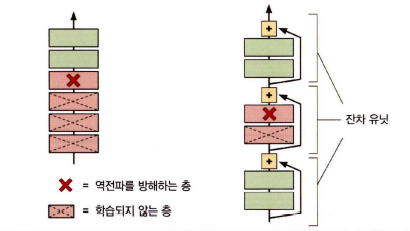

- 드롭아웃 층 제외, GoogLeNet과 똑같이 시작하고 종료. 중간에 단순 잔차 유닛을 매우 깊게 쌓은 것이 차이점
- 각 잔차 유닛은 배치 정규화(BN)와 ReLU, 3X3 커널 사용, 공간 정보를 유지하는 두 개의 합성곱 층으로 구성

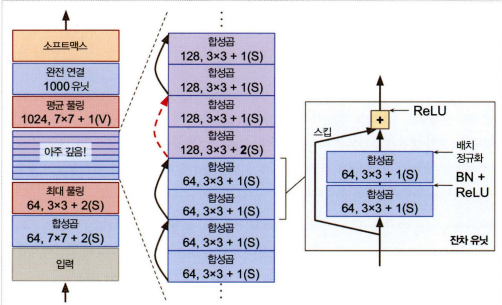

- 특성 맵의 수는 몇 개의 잔차 유닛마다 두 배로 증가, 높이와 너비는 절반으로 감소( 스트라이드=2 합성곱 층 사용) -> 입력과 출력의 크기가 달라 입력이 잔차 유닛의 출력에 바로 더하기 불가능
- 스트라이드=2 출력 특성 맵의 수가 같은 1X1 합성곱 층으로 입력 통과 시킴

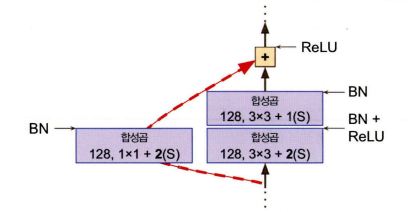

### 14.4.6 Xception

- 대규모 비전 문제에서 Inceptio-v3보다 성능 good
- 인셉션 모듈은 깊이별 분리 합성곱 층
- 일반적인 합성곱 층은 공간상의 패턴과 채널 사이의 패턴을 동시에 잡기 위해 필터 사용. But, 분리 합성곱 층은 공간 패턴과 채널 사이 패턴을 분리해 모델링을 할 수 있다고 가정
- 분리 합성곱 층은 두 부분으로 구성
> - 첫 번째 부분은 하나의 공간 필터를 각 입력 특성 맵에 적용
> - 두 번째 부분에서는 채널 사이 패턴만 조사

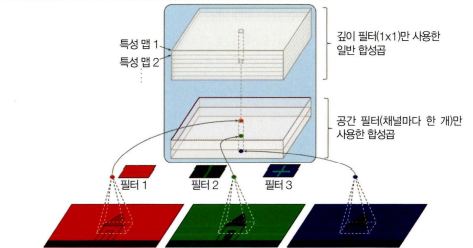

- 분리 합성곱 층은 입력 채널마다 하나의 공간 필터만 가짐 -> 입력층과 같이 채널이 너무 적은 층 다음에 사용하는 것은 피하기
- 이로 인해 Xception 구조는 2개의 일반 합성곱 층으로 시작, 나머지는 분리 합성곱만 사용, 몇 개의 최대 풀링 층과 전형적인 마지막 층들을 사용

### 14.4.7 SENet

- 인셉션 네트워크와 ResNet을 확장한 버전을 각각 SE-Inception과 SE-ResNet이라고 부름
- SENet은 원래 구조에 있는 모든 유닛에 SE 블록이라는 작은 신경망을 추가해 성능 향상

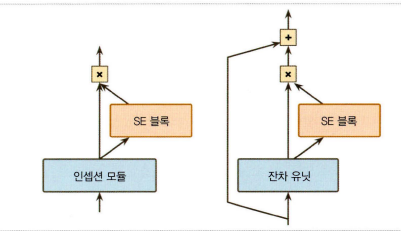

- SE 블록이 추가된 부분의 유닛의 출력을 깊이 차원에 초점을 맞춰 분석
- 어떤 특성이 일반적으로 동시에 가장 크게 활성화되는지 학습
- 이후 정보를 사용해 특성 맵 보정 -> 관련 없는 특성 맵의 값 줄임

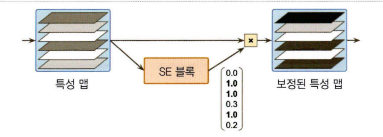

- 하나의 SE 블록은 3개의 층으로 구성
- 전역 평균 풀링 층과 ReLU 활성화 함수를 사용하는 밀집 은닉층, 시그모이드 활성화 함수를 사용하는 밀집 출력 층

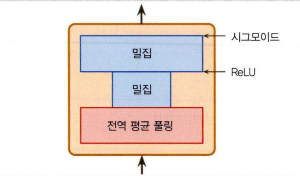

1. 전역 평균 풀링 층이 각 특성 맵에 대한 평균 활성화 값 계산
2. 다음 층에서 압축 발생. 이 저차원 벡터(임베딩)는 특성 응답의 분포 표현
3. 출력층은 임베딩을 받아 특성 맵마다 0과 1사ㅣ의 하나의 숫자를 담은 보정된 벡터를 출력
4. 특성 맵과 보정된 벡터를 곱해 관련 없는 특성값을 낮추고 관련 있는 특성값은 그대로 유지